<a href="https://colab.research.google.com/github/avisekksarma/ML-projects/blob/main/classify_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mnist
import torch
import torchvision
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F




In [ ]:
# augmentation
transform = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
])

# datasets
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)

In [ ]:
# dataloaders

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [ ]:
import matplotlib.pyplot as plt

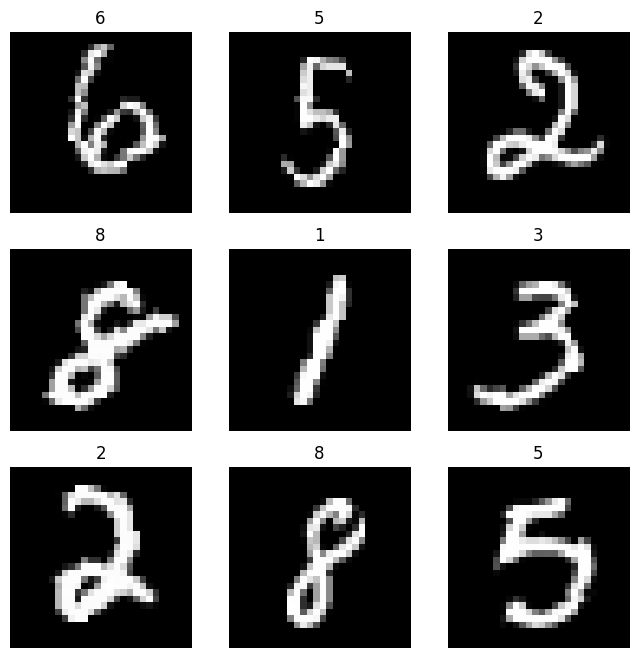

In [ ]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
# dataiter = iter(train_dataloader)
# images, labels = next(dataiter)
# images[0].shape

torch.Size([1, 28, 28])

In [ ]:
# create cnn
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 32, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(32, 64, 3)
    self.conv3 = nn.Conv2d(64, 128, 3)
    self.fc1 = nn.Linear(128*3*3, 256)
    self.fc2 = nn.Linear(256, 10)

  def forward(self,x):
    # print('1')
    # print(x.shape)
    x = F.relu(self.conv1(x))
    # print(x.shape)
    x = self.pool(x)
    # print('2')
    # print(x.shape)
    x = F.relu(self.conv2(x))
    # print(x.shape)
    x = self.pool(x)
    # print('3')
    # print(x.shape)
    x = F.relu(self.conv3(x))
    # print(x.shape)
    x = torch.flatten(x,1)
    # print('4')
    # print(x.shape)
    x = F.relu(self.fc1(x))
    # print(x.shape)
    x = self.fc2(x)
    # print('5')
    # print(x.shape)
    return x

In [ ]:
# hyperparameters for training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 10
batch_size = 64
learning_rate = 0.001

In [ ]:
# training part
model = ConvNet().to(device)
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [ ]:
# training loop
n_total_steps = len(train_dataloader)
for epoch in range(num_epochs):
  running_loss = 0.0
  for i,(images,labels) in enumerate(train_dataloader):
    images = images.to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images)
    loss = criteria(outputs,labels)

    # backward pass and optimize parameters
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    running_loss += loss.item()
  print(f'[{epoch + 1}] loss: {running_loss / n_total_steps:.3f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)


[1] loss: 0.195
[2] loss: 0.057
[3] loss: 0.042
[4] loss: 0.035
[5] loss: 0.028
[6] loss: 0.024
[7] loss: 0.023
[8] loss: 0.017
[9] loss: 0.018
[10] loss: 0.017
Finished Training


In [ ]:
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH)) # it takes the loaded dictionary, not the path file itself
loaded_model.to(device)
loaded_model.eval()

with torch.no_grad():
    n_correct = 0
    n_correct2 = 0
    n_samples = len(test_dataloader.dataset)

    for images, labels in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

        outputs2 = loaded_model(images)
        _, predicted2 = torch.max(outputs2, 1)
        n_correct2 += (predicted2 == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the model: {acc} %')

    acc = 100.0 * n_correct2 / n_samples
    print(f'Accuracy of the loaded model: {acc} %')

Accuracy of the model: 99.09 %
Accuracy of the loaded model: 99.09 %


In [ ]:
# model prediction
imgs = []
lbls = []
preds = []
for images,labels in test_dataloader:
  # print(images)
  print(images.shape)
  f = images[0]
  print(f.shape)
  print(labels.shape)
  outputs = model(images)
  _, predicted = torch.max(outputs, 1)
  print(predicted.shape)
  imgs = images
  lbls = labels
  preds = predicted
  break


torch.Size([64, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([64])
torch.Size([64])


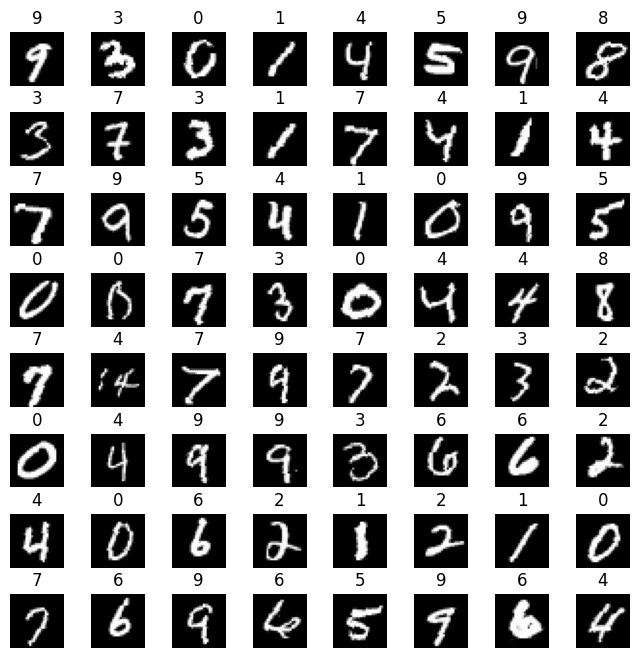

In [ ]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 8, 8
count = 0
for i in range(1, cols * rows + 1):
    # img = imgs[count]
    # label = preds[count]
    img = imgs[i - 1]
    label = preds[i - 1].item()
    # print(img.shape)
    # print(label)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    # break
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()